# Oversampling with SMOTE

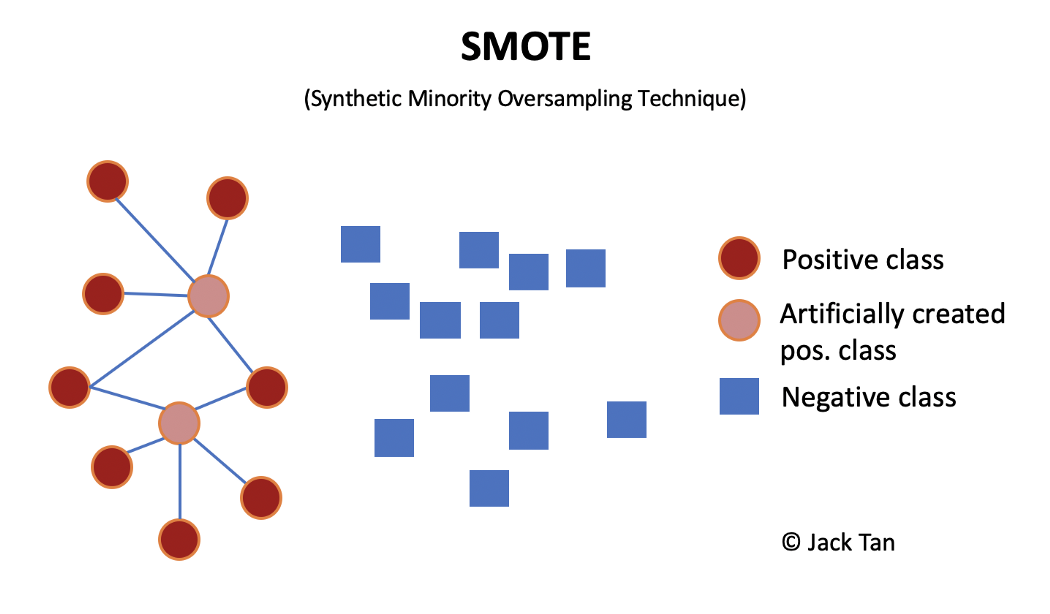

For over-sampling techniques, SMOTE (Synthetic Minority Oversampling Technique) is considered as one of the most popular and influential data sampling algorithms in ML and data mining. With SMOTE, the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement [2]. These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.

The code snippet is split into two parts: PART 1 shows you the codes to oversample the minority class with SMOTE; PART 2 trains the resampled data with Support Vector Machine and output the ROC AUC score.

In [1]:
#PART 1
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import data
url = "https://raw.githubusercontent.com/jackty9/Handling_Imbalanced_Data_in_Python/master/bank-full-encoded.csv"
df = pd.read_csv(url)

# Separating the independent variables from dependent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 27926, 1: 3721})
After oversampling:  Counter({0: 27926, 1: 27926})
ROC AUC score for oversampled SMOTE data:  0.75092260770597
